In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import operator
from utils import buildNetwork, load_cifar
#import urllib.request

In [2]:
# Let's start a Session
sess = tf.Session()

In [3]:
batch_size = 1
HEIGHT = 32
WIDTH = 32
CHANNELS = 3
NUM_CLASSES = 10

In [4]:
data_path = "data/CIFAR-10/"

train_samples, train_labels, val_samples, val_labels = load_cifar(data_path)

In [5]:
# TODO add placeholder for inputs
inputs = tf.placeholder(tf.float32,name='input',shape=[batch_size,WIDTH,HEIGHT,CHANNELS])

logits = buildNetwork(inputs, batch_size)

## Task: Restore the previously stored checkpoint

In [6]:
# TODO restore the saved checkpoints ./checkpoints/model.ckpt
saver = tf.train.Saver()
saver.restore(sess, "./checkpoints/model.ckpt")



INFO:tensorflow:Restoring parameters from ./checkpoints/model.ckpt


## Task: Transform logits to probabilities

In [7]:
# TODO add an appropriate op to convert the logits into probabilities
probs = tf.nn.softmax(logits)

## Task:  Inference. Display results

[[ 0.00617359  0.00138411  0.0312091   0.48961064  0.02951464  0.34422138
   0.02604361  0.06015333  0.00399231  0.00769731]]
1.00000002864
[[  6.06979057e-02   1.37802539e-02   5.59127098e-03   2.09430465e-03
    2.05022376e-03   6.47759938e-04   1.35531998e-03   5.84635301e-04
    9.11093295e-01   2.10510474e-03]]
1.00000007363
[[ 0.24170014  0.00781306  0.05015541  0.01732006  0.06701606  0.00679084
   0.00406309  0.01210235  0.58045459  0.01258438]]
0.999999982305
[[ 0.55012757  0.02359009  0.05401829  0.0050385   0.01151507  0.00106987
   0.00538092  0.0010851   0.34382933  0.00434527]]
1.00000001211
[[  2.18384652e-04   1.15448311e-04   2.50826683e-02   8.62016063e-03
    1.25949029e-02   2.00825650e-03   9.50977087e-01   2.90922908e-04
    3.14433237e-05   6.07212351e-05]]
0.999999995762


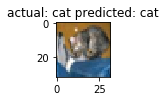

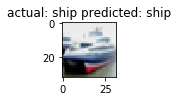

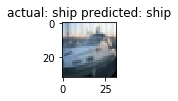

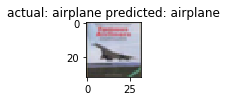

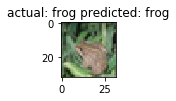

In [8]:
label_to_name = ['airplane', 'automobile', 'bird', 'cat', 'deer' , 'dog', 'frog', 'horse', 'ship', 'truck']

# TODO plot the first five *validation* images 
for index in range(5):
    feed_dict = {inputs: [val_samples[index]]}
    classification = sess.run(probs, feed_dict)
    print(classification)
    print(sum(classification[0]))
    idx = max(enumerate(classification[0]), key=operator.itemgetter(1))[0]
    plt.figure(figsize=(1,1))
    plt.title('actual: '+label_to_name[val_labels[index]]+' predicted: '+ label_to_name[idx])
    plt.imshow(val_samples[index])



In [9]:
# TODO for each image, print the predicted class and the probability vector for all classes

for index in range(val_samples.shape[0]):
    feed_dict = {inputs: [val_samples[index]]}
    classification = sess.run(probs, feed_dict)
    idx = max(enumerate(classification[0]), key=operator.itemgetter(1))[0]
    #plt.figure(figsize=(1,1))
    print('actual: '+label_to_name[val_labels[index]]+' predicted: '+ label_to_name[idx])
    for i in range(10):
        print (label_to_name[i]+': '+str(classification[0][i]))
    print('--------------')

actual: cat predicted: cat
airplane: 0.00617359
automobile: 0.00138411
bird: 0.0312091
cat: 0.489611
deer: 0.0295146
dog: 0.344221
frog: 0.0260436
horse: 0.0601533
ship: 0.00399231
truck: 0.00769731
--------------
actual: ship predicted: ship
airplane: 0.0606979
automobile: 0.0137803
bird: 0.00559127
cat: 0.0020943
deer: 0.00205022
dog: 0.00064776
frog: 0.00135532
horse: 0.000584635
ship: 0.911093
truck: 0.0021051
--------------
actual: ship predicted: ship
airplane: 0.2417
automobile: 0.00781306
bird: 0.0501554
cat: 0.0173201
deer: 0.0670161
dog: 0.00679084
frog: 0.00406309
horse: 0.0121024
ship: 0.580455
truck: 0.0125844
--------------
actual: airplane predicted: airplane
airplane: 0.550128
automobile: 0.0235901
bird: 0.0540183
cat: 0.0050385
deer: 0.0115151
dog: 0.00106987
frog: 0.00538092
horse: 0.0010851
ship: 0.343829
truck: 0.00434527
--------------
actual: frog predicted: frog
airplane: 0.000218385
automobile: 0.000115448
bird: 0.0250827
cat: 0.00862016
deer: 0.0125949
dog: 0.0